# TensorFlow

## Кластеризация

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.preprocessing import LabelEncoder

In [3]:
train_df = pd.read_csv('./data/train.csv')

In [4]:
color_dict = {'red': 0, 'blue': 1, 'green': 2, 'teal': 3, 'orange': 4, 'purple': 5}
train_df['color'] = train_df.color.apply(lambda x: color_dict[x])

In [5]:
#encoder =  LabelEncoder() # создаём переменную класса LabelEncoder - кодировщик
#train_df['color'] = encoder.fit_transform(train_df['color']) # используем кодировщик, чтобы "перевести" строковые названия в числа 

In [6]:
train_df.head()

,x,y,color
0,0.129270,1.979720,0
1,-0.380831,1.693519,0
2,0.718693,1.791793,0
3,0.722922,0.620655,0
4,-0.432689,0.541550,0


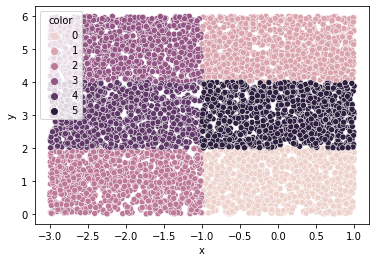

In [7]:
sns.scatterplot(data=train_df, x='x', y='y', hue='color')
plt.show()

Т.к. мы обучаем модель батчами, а данные у нас идут по порядку, то их нужно перемещать, чтобы в каждый батч входили разные данные. Так для модели будет спроецирована более жизненная ситуация:

In [8]:
np.random.shuffle(train_df.values)

In [9]:
x = np.column_stack((train_df.x.values, train_df.y.values)) # векторизиурем признаки и соединим их

Разделим на тестовую и обучающую выборки

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, train_df.color.values, test_size=0.2, random_state=42, stratify=train_df.color.values)

Здесь ниже создаем саму модель: 

Что нужно поменять здесь:

- Последний слой выводит кол-во нейронов равное 2, а у нас 6 разных таргетов. Это надо изменить

In [11]:
model = keras.Sequential([ # Sequential - значит, что у нас есть определенное кол-во слоев в сети. Этот тип, позволяет 
    #перечислить эти слои
    #Здесь первый слой - это  вхожной слой, куда поступают данные, а второй слой - слой на выходе
    keras.layers.Dense(units = 32, input_shape=(2,), activation='relu'), #здесь мы получаем доступ к слоям (к примеру нажми на Tab и увидишь наименования слоев)
    #нам нужно сеть, у которая все связи полностью прямо соеденены, поэтому мы выбираем Dense
    #Units  - количество нейронов
    #input_shape = размерность пространства признаков (2 признака, поэтому оставляем 2)
    #activation - функция активации. Самое надежное - это relu.
    #keras.layers.Dropout(rate=0.2), #Данный слой помогает уменьшить переобучение (рандомно разрывает нейроные связи в каждом обновлении)
    #rate - процент, который определяет рандомность разрыва связей (то есть здесь некоторые units спадают на 0)
    keras.layers.Dense(units = 32, activation='relu'),
    keras.layers.Dense(units = 6, activation='sigmoid')])
    #Количество "нейронов" - 6 на выходе, т.к. точки могут иметь 6 цветов
    # для задания бинарной классификации лучше подходит sigmoid

In [12]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']) #здесь мы говорим как модели обучаться.
# adam - наиболее безопасная модель оптимайзера
# loss - функций потерь (чему модель отдает предпочтение в процессе обучения) 
#(возвращает число потерь от неправильных ответов модели и обычно применяется для обучения). 
#Используем sparse_categorical_crossentropy, т.к.
# целевой признак у нас не one-hot-encoding, a ordinal encoding
# from_logits - ставим True, когда сумма ответом может быть не один (то есть может быть 5). Значит, значения не являеются вероятность
# от 0 до 1.
#metrics = 'accuracy' - метрика качества

Сам процесс обучения:

- Здесь мы можем повысить количество эпох

In [13]:
model.fit(x, train_df.color.values, batch_size=4, epochs = 10) #векторизируем признаки и таргеты

Epoch 1/10


C:\Users\yanka\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
C:\Users\yanka\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 2s 993us/step - loss: 0.5230 - accuracy: 0.8265
Epoch 2/10
1500/1500 [==============================] - 1s 950us/step - loss: 0.1552 - accuracy: 0.9532
Epoch 3/10
1500/1500 [==============================] - 1s 924us/step - loss: 0.1163 - accuracy: 0.9637
Epoch 4/10
1500/1500 [==============================] - 1s 998us/step - loss: 0.1012 - accuracy: 0.9627
Epoch 5/10
1500/1500 [==============================] - 1s 925us/step - loss: 0.0916 - accuracy: 0.9670
Epoch 6/10
1500/1500 [==============================] - 1s 932us/step - loss: 0.0791 - accuracy: 0.9717
Epoch 7/10
1500/1500 [==============================] - 1s 950us/step - loss: 0.0766 - accuracy: 0.9707
Epoch 8/10
1500/1500 [==============================] - 1s 923us/step - loss: 0.0727 - accuracy: 0.9740
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0688 - accuracy: 0.9700
Epoch 10/10
1500/1500 [==============================] - 1s 974us/step - loss

Проверим на тестовой выборке:

In [14]:
model.evaluate(x_test, y_test)

38/38 [==============================] - 0s 919us/step - loss: 0.0704 - accuracy: 0.9700


C:\Users\yanka\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.07041729241609573, 0.9700000286102295]

Иногда нам нужно узнать предсказание для одного образца и вот как это можно сделать:

In [17]:
model.predict(np.array([[0,3]])) #Здесь мы передаем координаты для точки
#Здесь мы получаем вероятность с которой мы можем считать, что точка относится к определенному классу

1/1 [==============================] - 0s 70ms/step


array([[2.8717137e-05, 2.5266520e-04, 5.9821263e-12, 3.2941282e-13,
        2.4979092e-06, 9.9977016e-01]], dtype=float32)

Округлим значения, чтобы получить более понятный ответ

In [18]:
np.round(model.predict(np.array([[0,3]])))

1/1 [==============================] - 0s 24ms/step


array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

Точка относится к последнему (6-му) классу

Посмотрим на сколько это действительно так:

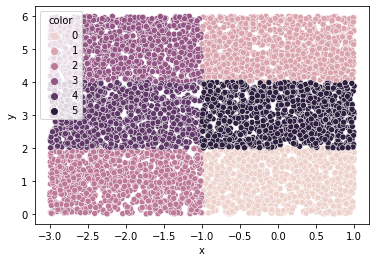

In [19]:
sns.scatterplot(data=train_df, x='x', y='y', hue='color')
plt.show()